In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Bakery Sales Dataset
https://www.kaggle.com/datasets/akashdeepkuila/bakery?resource=download

In [2]:
bakery = pd.read_csv('Bakery.csv')
bakery

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


### History Bulk
From Openweathermap https://openweathermap.org/history-bulk  
File format: CSV  
Units: Kelvin  

Edinburgh(55.95, -3.19)  
Temperature, Min temperature, Max temperature, Feels like, Pressure, Humidity, Clouds, Weather conditions, Rain, Snow, Dew point, Visibility, Wind (speed, direction, gust)
1 Jan, 1979 - 31 Mar, 2023  
Created at: 17 Apr, 2023

In [3]:
weather = pd.read_csv('e11cb5927a9fcef33d948c6751057c12.csv')
weather

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,0,Edinburgh,55.953252,-3.188267,264.78,10000.0,262.12,259.48,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
1,284000400,1979-01-01 01:00:00 +0000 UTC,0,Edinburgh,55.953252,-3.188267,264.49,10000.0,261.84,259.13,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2,284004000,1979-01-01 02:00:00 +0000 UTC,0,Edinburgh,55.953252,-3.188267,264.14,10000.0,261.35,259.32,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,284007600,1979-01-01 03:00:00 +0000 UTC,0,Edinburgh,55.953252,-3.188267,264.42,10000.0,261.62,264.42,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,284011200,1979-01-01 04:00:00 +0000 UTC,0,Edinburgh,55.953252,-3.188267,264.76,10000.0,261.96,258.47,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396335,1680289200,2023-03-31 19:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,278.90,7000.0,278.31,275.36,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
396336,1680292800,2023-03-31 20:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,278.86,7000.0,278.27,275.82,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
396337,1680296400,2023-03-31 21:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,278.87,6000.0,278.43,275.32,...,NaN,0.25,NaN,NaN,NaN,75,500,Rain,light rain,10n
396338,1680300000,2023-03-31 22:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,278.42,8000.0,277.69,275.00,...,NaN,NaN,NaN,NaN,NaN,75,500,Rain,light rain,10n


In [4]:
weather['dt_time'] = ''

In [5]:
weather = weather[weather['dt_iso'].str.contains('2016-1|2017-0|2017-09-0')]#必要データのみ取り出し

In [6]:
for i in range(len(weather)):
    #datetime表記にして、Edinburgh時刻に変更
    weather.iloc[i,28] = datetime.datetime(int(weather.iloc[i,1][0:4]),int(weather.iloc[i,1][5:7]),int(weather.iloc[i,1][8:10]),int(weather.iloc[i,1][11:13])) + datetime.timedelta(hours=1)

In [7]:
weather

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,dt_time
338227,1475280000,2016-10-01 00:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,278.08,10000.0,277.64,278.08,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2016-10-01 01:00:00
338228,1475283600,2016-10-01 01:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,278.18,10000.0,277.89,278.18,...,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n,2016-10-01 02:00:00
338229,1475287200,2016-10-01 02:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,277.08,10000.0,276.65,277.08,...,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n,2016-10-01 03:00:00
338230,1475290800,2016-10-01 03:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,277.18,10000.0,276.75,277.18,...,0.17,NaN,NaN,NaN,40,500,Rain,light rain,10n,2016-10-01 04:00:00
338231,1475294400,2016-10-01 04:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,277.08,10000.0,276.79,275.88,...,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n,2016-10-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347090,1506798000,2017-09-30 19:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,281.08,10000.0,279.22,279.84,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2017-09-30 20:00:00
347091,1506801600,2017-09-30 20:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,280.08,10000.0,277.22,278.26,...,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n,2017-09-30 21:00:00
347092,1506805200,2017-09-30 21:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,279.38,10000.0,277.38,279.38,...,NaN,NaN,NaN,NaN,0,741,Fog,fog,50n,2017-09-30 22:00:00
347093,1506808800,2017-09-30 22:00:00 +0000 UTC,3600,Edinburgh,55.953252,-3.188267,277.78,10000.0,276.75,277.78,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2017-09-30 23:00:00


### csv結合
時刻からcsvを結合させる.  
1.Bakery.csvの時刻を、12:34:12->12:00:00に変更する  
2.Bakery.csvと天気データを外部結合する  
3.データ保存

In [8]:
#1.Bakery.csvの時刻を、12:34:12->12:00:00に変更する
bakery['dt_time'] = ''
for i in range(len(bakery)):
    bakery.iloc[i, 5] = datetime.datetime(int(bakery.iloc[i,2][0:4]),int(bakery.iloc[i,2][5:7]),int(bakery.iloc[i,2][8:10]),int(bakery.iloc[i,2][11:13]))
bakery

,TransactionNo,Items,DateTime,Daypart,DayType,dt_time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:00:00
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:00:00
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:00:00
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:00:00
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:00:00
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04 14:00:00
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04 14:00:00
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04 14:00:00
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04 14:00:00


In [9]:
#2.Bakery.csvと天気データを外部結合する
marge_data = pd.merge(bakery, weather, on='dt_time', how='left')

In [10]:
#3.データ保存
marge_data.to_csv('Bakery_withWeather.csv')

### データ化可視化
temp, visibility, dew_point, feels_like, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg：数値  
weather_main, weather_description：気象情報文字列

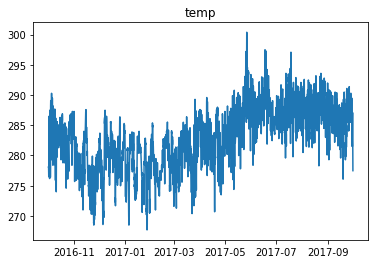

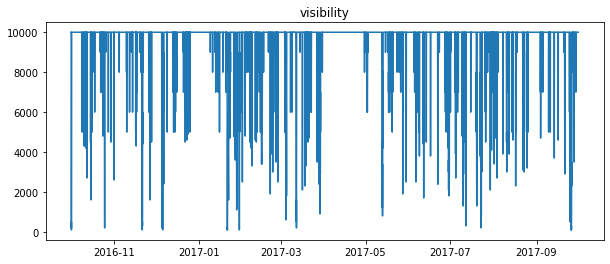

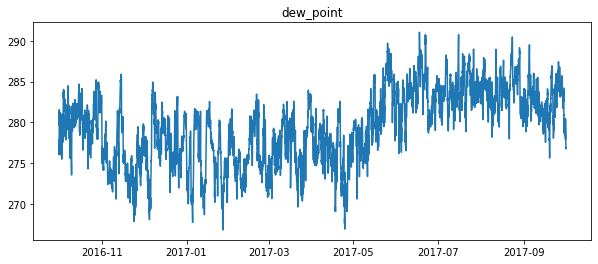

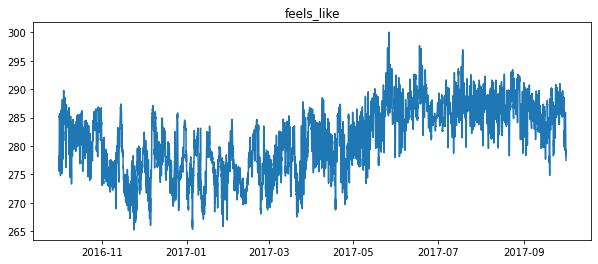

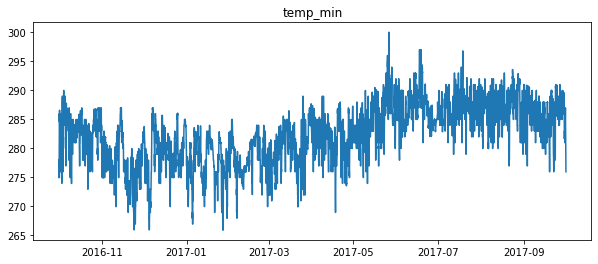

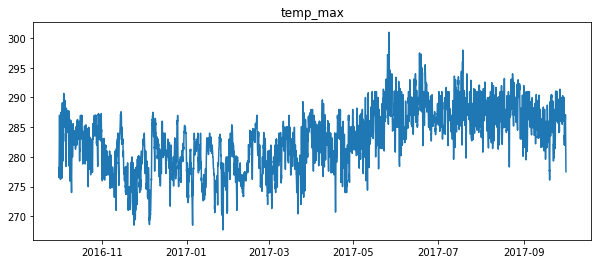

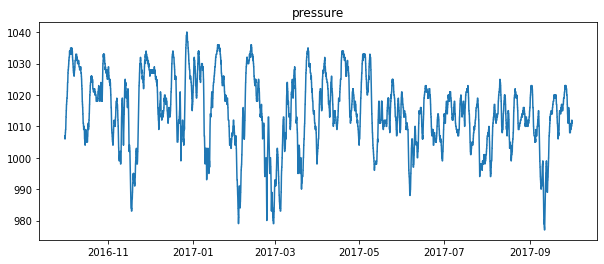

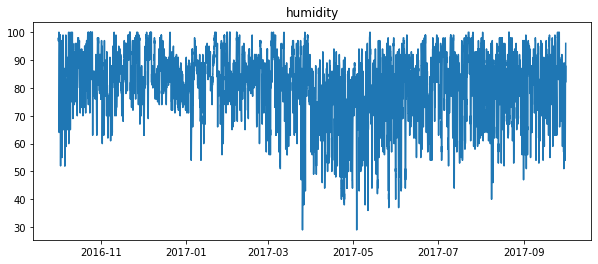

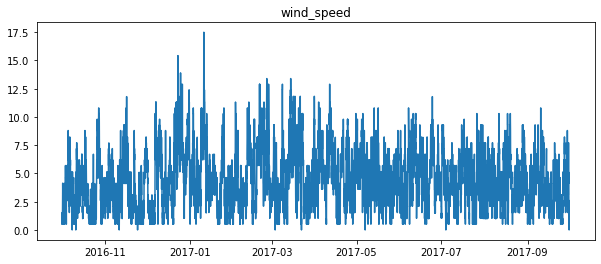

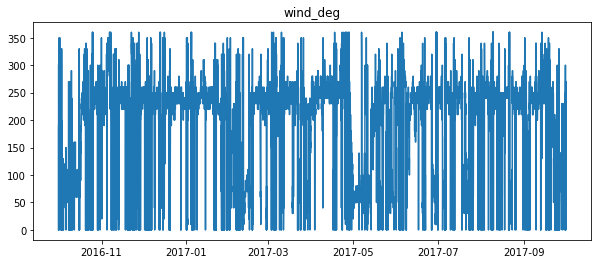

In [11]:
#気象データ
graph_labels = ['temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg']
for i in range(len(graph_labels)):
    plt.rcParams["figure.figsize"] = [10,4.0]  
    plt.plot(weather['dt_time'],weather['{}'.format(graph_labels[i])]) 
    plt.title('{}'.format(graph_labels[i]))
    plt.show()

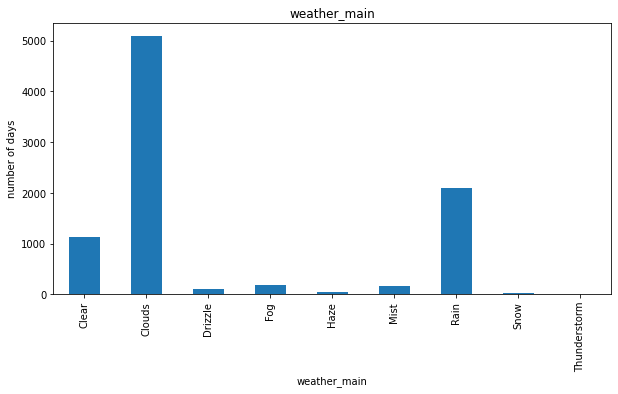

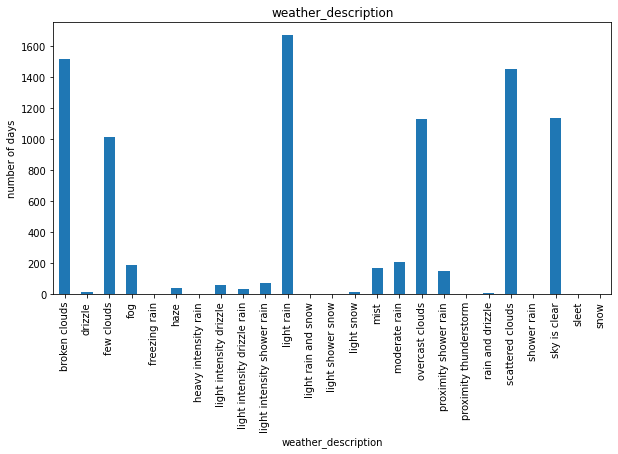

In [12]:
graph_labels = ['weather_main', 'weather_description']
for i in range(len(graph_labels)):
    pivot = weather.pivot_table(index = ['{}'.format(graph_labels[i])], aggfunc = 'size')
    pivot.plot.bar(figsize=(10,5), title='{}'.format(graph_labels[i]))
    plt.ylabel("number of days")
    plt.show()